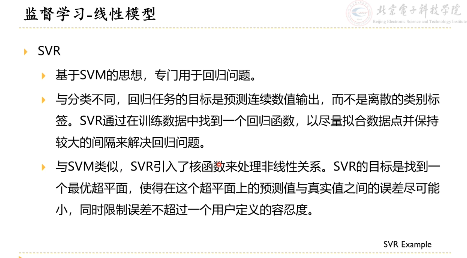

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,GridSearchCV

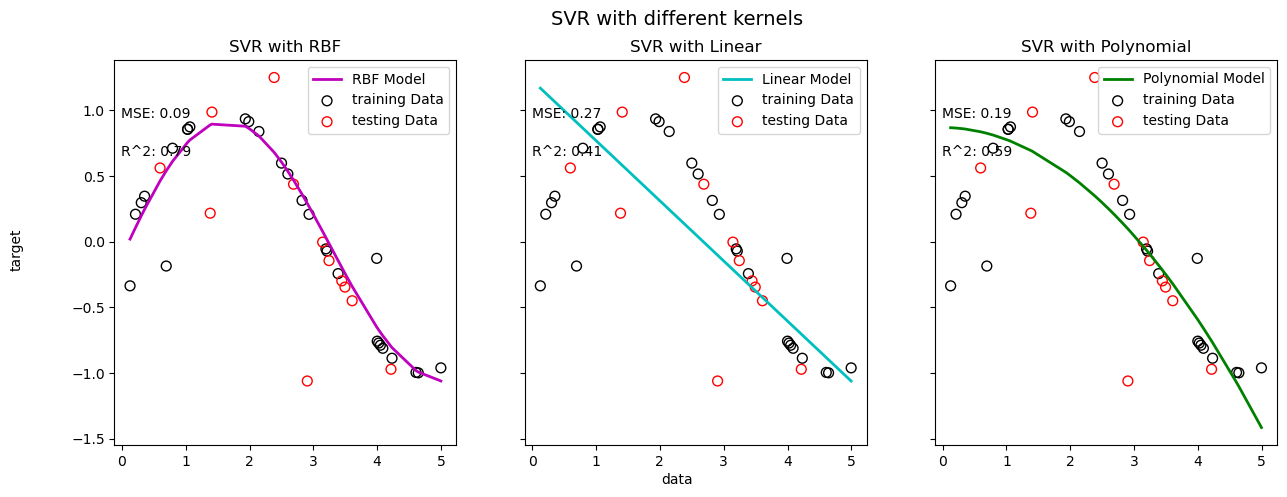

In [8]:
# 生成样本数据
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# 向目标值添加噪声
y[::5] += 3 * (0.5 - np.random.rand(8))


# 将数据划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


# 定义SVR模型
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

# 使用网络搜索法搜索最优参数
param_grid = {'C': [1, 10, 100],
              'kernel': ['linear', 'poly', 'rbf'],
              'gamma': [0.1,]
              }
grid_search = GridSearchCV(SVR(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 获取最佳模型
best_svr = grid_search.best_estimator_

# 用于可视化的设置
lw = 2
svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

# 创建子图
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True)

# 训练模型并绘制结果
for ix, svr in enumerate(svrs):
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X)
    axes[ix].plot(X,y_pred, color=model_color[ix], lw=lw, label='{} Model'.format(kernel_label[ix]))
    axes[ix].scatter(X_train, y_train, facecolor="none", edgecolor='k', s=50, label='training Data')
    axes[ix].scatter(X_test, y_test, facecolor="none", edgecolor='r', s=50, label='testing Data')
    axes[ix].legend()
    axes[ix].set_title("SVR with {}".format(kernel_label[ix]))
    axes[ix].text(0.02, 0.85, 'MSE: {:.2f}'.format(mean_squared_error(y, y_pred)),
                  transform=axes[ix].transAxes)
    axes[ix].text(0.02, 0.75, 'R^2: {:.2f}'.format(r2_score(y, y_pred)),
                  transform=axes[ix].transAxes)
    
fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("SVR with different kernels", fontsize=14)
plt.show()

# 训练模型

In [9]:
# 打印最佳超参数和评估指标
print("最佳超参数：",grid_search.best_params_)
y_pred_train = best_svr.predict(X_train)
y_pred_test = best_svr.predict(X_test)
print("训练集MSE:",mean_squared_error(y_train,y_pred_train))
print("测试集MSE:",mean_squared_error(y_test,y_pred_test))
print("训练集R2:",r2_score(y_train,y_pred_train))
print("测试集R2:",r2_score(y_test,y_pred_test))

最佳超参数： {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
训练集MSE: 0.038628980499779524
测试集MSE: 0.21925818084140028
训练集R2: 0.9136742897959598
测试集R2: 0.5288183258800028
